Homework 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')
sc=StandardScaler()

1.	Consider building an SVM classifier for the following two-class training data: 
Positive class: { (-1, 3)  (0, 2)  (0, 1)  (0, 0) }; Negative class: { (1, 5)  (1, 6)  (3, 3) }
a.	Plot the training points. Use ‘+’ for positive class and ‘o’ for the negative class.


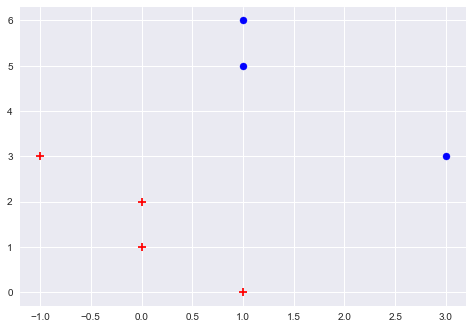

In [2]:
P=np.array([[-1,3],[0,2],[0,1],[1,0]])
N=np.array([[1,5],[1,6],[3,3]])
plt.scatter(P[:, 0], P[:, 1], c='r', s=50,marker='+',cmap='spring');
plt.scatter(N[:, 0], N[:, 1], c='b', s=50,marker='o',cmap='spring');

b.	By inspection, draw a linear classifier that separates the data with maximum margin.

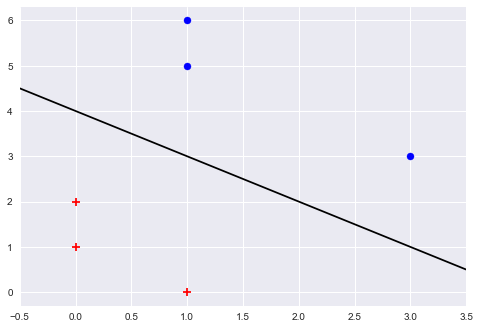

In [3]:
plt.scatter(P[:, 0], P[:, 1], c='r', s=50,marker='+',cmap='spring');
plt.scatter(N[:, 0], N[:, 1], c='b', s=50,marker='o',cmap='spring');
xfit = np.linspace(-2, 4)
plt.plot(xfit, -1 * xfit + 4 , '-k')
plt.xlim(-0.5, 3.5);

d.	Suppose you observe an additional set of points, all from the positive class. 
Additional data points in positive class: { (−2, 0)  (−2, 1)  (−2, 3)  (−1, 0)  (−1, 1) }
What is the linear SVM (in terms of w and b) now? 

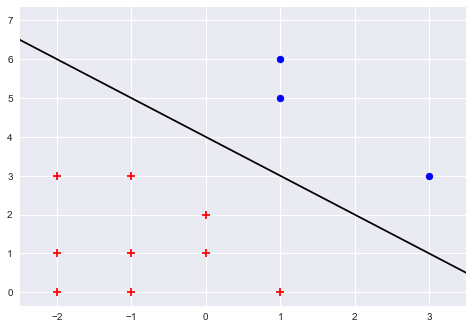

In [4]:
P = np.append(P,np.array([[-2,0],[-2,1],[-2,3],[-1,0],[-1,1]]),axis=0)
plt.scatter(P[:, 0], P[:, 1], c='r', s=50,marker='+',cmap='spring');
plt.scatter(N[:, 0], N[:, 1], c='b', s=50,marker='o',cmap='spring');
xfit = np.linspace(-3, 4)
plt.plot(xfit, -1 * xfit + 4 , '-k')
plt.xlim(-2.5, 3.5);

3.In this problem, we will look at the Breast Cancer Wisconsin (Diagnostic) Data Set available UCI Machine Learning Repository. Please use the wdbc.data dataset.

•	Compute the performance of the SVM algorithm on this dataset for predicting the whether the cancer is malignant or benign. Use a random train/test data split of 70%/30%. Repeat this process 20 times and compute the average performance.

In [6]:
from sklearn.svm import SVC  # "Support Vector Classifier"
from sklearn.metrics import accuracy_score,precision_score,recall_score
import pandas as pd
from sklearn.model_selection import train_test_split

colname=['ID','Diagnosis']+['feature_%s' %i for i in range(1,31)]
#print(colname)
df = pd.read_csv('wdbc.data',header=None,names=colname)
X = df[lambda df: df.columns[2:32]].values
Y = df['Diagnosis'].values
monte=20 # Monte Carlo cycle times

#
# SVM with linear kernel
#

dt1_accuracy_train,dt1_accuracy_test,dt1_precision,dt1_recall =(np.zeros(monte) for i in range(4))
#dt2_accuracy_train,dt2_accuracy_test,dt2_precision,dt2_recall=(np.zeros(monte) for i in range(4))
for i_process in range(monte):
    (X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, random_state=2,test_size=0.3,stratify=Y)
    sc.fit(X_train)
    X_train=sc.transform(X_train)
    X_test=sc.transform(X_test)
    clf_1 = SVC(kernel='linear')
    clf_1.fit(X_train, Y_train)
    Y_pre_train=clf_1.predict(X_train)
    Y_pre_test=clf_1.predict(X_test)
    dt1_accuracy_train[i_process]=accuracy_score(Y_train, Y_pre_train)
    dt1_accuracy_test[i_process]=accuracy_score(Y_test, Y_pre_test)
    dt1_precision[i_process]=precision_score(Y_test, Y_pre_test,pos_label='M')
    dt1_recall[i_process]=recall_score(Y_test, Y_pre_test,pos_label='M')
    
dt1_avg_accuracy_train=np.mean(dt1_accuracy_train)
dt1_avg_accuracy_test=np.mean(dt1_accuracy_test)
dt1_avg_precision=np.mean(dt1_precision)
dt1_avg_recall=np.mean(dt1_recall)
print([dt1_avg_accuracy_train,dt1_avg_accuracy_test,dt1_avg_precision,dt1_avg_recall])

[0.9924623115577887, 0.9590643274853798, 0.9672131147540984, 0.921875]


•	Please evaluate the following algorithms:

•	SVM1: SVM with linear kernel

•	SVM2: SVM with RBF kernel

•	SVM3: Same as SVM2 but with regularization (soft margin), vary C and report your best results.


In [7]:
#
# SVM with RBF kernel
#

monte=20 # Monte Carlo cycle times
dt1_accuracy_train,dt1_accuracy_test,dt1_precision,dt1_recall =(np.zeros(monte) for i in range(4))
#dt2_accuracy_train,dt2_accuracy_test,dt2_precision,dt2_recall=(np.zeros(monte) for i in range(4))
for i_process in range(monte):
    (X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, random_state=2,test_size=0.3,stratify=Y)
    clf_1 = SVC(kernel='rbf')
    sc.fit(X_train)
    X_train=sc.transform(X_train)
    X_test=sc.transform(X_test)
    clf_1.fit(X_train, Y_train)
    Y_pre_train=clf_1.predict(X_train)
    Y_pre_test=clf_1.predict(X_test)
    dt1_accuracy_train[i_process]=accuracy_score(Y_train, Y_pre_train)
    dt1_accuracy_test[i_process]=accuracy_score(Y_test, Y_pre_test)
    dt1_precision[i_process]=precision_score(Y_test, Y_pre_test,pos_label='M')
    dt1_recall[i_process]=recall_score(Y_test, Y_pre_test,pos_label='M')
    
dt1_avg_accuracy_train=np.mean(dt1_accuracy_train)
dt1_avg_accuracy_test=np.mean(dt1_accuracy_test)
dt1_avg_precision=np.mean(dt1_precision)
dt1_avg_recall=np.mean(dt1_recall)
print([dt1_avg_accuracy_train,dt1_avg_accuracy_test,dt1_avg_precision,dt1_avg_recall])

[0.9924623115577887, 0.9590643274853798, 0.9830508474576269, 0.90625]


In [10]:
#
# SVM with RBF kernel but vary C
#

monte=20 # Monte Carlo cycle times
result=np.zeros((40,5))
#c_def = range(0,20,0.5)
for c_def in np.arange(0.1,20.1,0.5):
    dt1_accuracy_train,dt1_accuracy_test,dt1_precision,dt1_recall =(np.zeros(monte) for i in range(4))
    #dt2_accuracy_train,dt2_accuracy_test,dt2_precision,dt2_recall=(np.zeros(monte) for i in range(4))
    
    for i_process in range(monte):
        (X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, random_state=2,test_size=0.3,stratify=Y)
        sc.fit(X_train)
        X_train=sc.transform(X_train)
        X_test=sc.transform(X_test)
        clf_1 = SVC(kernel='rbf',C=c_def)
        clf_1.fit(X_train, Y_train)
        Y_pre_train=clf_1.predict(X_train)
        Y_pre_test=clf_1.predict(X_test)
        dt1_accuracy_train[i_process]=accuracy_score(Y_train, Y_pre_train)
        dt1_accuracy_test[i_process]=accuracy_score(Y_test, Y_pre_test)
        dt1_precision[i_process]=precision_score(Y_test, Y_pre_test,pos_label='M')
        dt1_recall[i_process]=recall_score(Y_test, Y_pre_test,pos_label='M')
    
    dt1_avg_accuracy_train=np.mean(dt1_accuracy_train)
    dt1_avg_accuracy_test=np.mean(dt1_accuracy_test)
    dt1_avg_precision=np.mean(dt1_precision)
    dt1_avg_recall=np.mean(dt1_recall)
    row_num=round((c_def-0.1)*2)
    result[row_num]=[c_def,dt1_avg_accuracy_train,dt1_avg_accuracy_test,dt1_avg_precision,dt1_avg_recall]

print(result)


[[ 0.1         0.95979899  0.92397661  1.          0.796875  ]
 [ 0.6         0.99246231  0.95906433  0.98305085  0.90625   ]
 [ 1.1         0.99246231  0.95321637  0.98275862  0.890625  ]
 [ 1.6         0.99497487  0.97076023  0.98360656  0.9375    ]
 [ 2.1         0.99497487  0.96491228  0.98333333  0.921875  ]
 [ 2.6         0.99497487  0.96491228  0.96774194  0.9375    ]
 [ 3.1         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 3.6         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 4.1         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 4.6         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 5.1         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 5.6         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 6.1         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 6.6         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 7.1         0.99497487  0.95906433  0.96721311  0.921875  ]
 [ 7.6         0.99497487  0.96491228  0.98333333  0.92

The result shows that the best C is in [1.1,3.1]

In [11]:
#
# SVM with RBF kernel but vary C from 1.1 to 3.1
#

monte=20 # Monte Carlo cycle times
result=np.zeros((200,5))
#c_def = range(0,20,0.5)
for c_def in np.arange(1.1,3.1,0.01):
    dt1_accuracy_train,dt1_accuracy_test,dt1_precision,dt1_recall =(np.zeros(monte) for i in range(4))
    #dt2_accuracy_train,dt2_accuracy_test,dt2_precision,dt2_recall=(np.zeros(monte) for i in range(4))
    
    for i_process in range(monte):
        (X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, random_state=2,test_size=0.3,stratify=Y)
        sc.fit(X_train)
        X_train=sc.transform(X_train)
        X_test=sc.transform(X_test)
        clf_1 = SVC(kernel='rbf',C=c_def)
        clf_1.fit(X_train, Y_train)
        Y_pre_train=clf_1.predict(X_train)
        Y_pre_test=clf_1.predict(X_test)
        dt1_accuracy_train[i_process]=accuracy_score(Y_train, Y_pre_train)
        dt1_accuracy_test[i_process]=accuracy_score(Y_test, Y_pre_test)
        dt1_precision[i_process]=precision_score(Y_test, Y_pre_test,pos_label='M')
        dt1_recall[i_process]=recall_score(Y_test, Y_pre_test,pos_label='M')
    
    dt1_avg_accuracy_train=np.mean(dt1_accuracy_train)
    dt1_avg_accuracy_test=np.mean(dt1_accuracy_test)
    dt1_avg_precision=np.mean(dt1_precision)
    dt1_avg_recall=np.mean(dt1_recall)
    row_num=round((c_def-1.1)*100)
    result[row_num]=[c_def,dt1_avg_accuracy_train,dt1_avg_accuracy_test,dt1_avg_precision,dt1_avg_recall]

print(result)



[[1.1        0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.11       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.12       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.13       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.14       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.15       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.16       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.17       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.18       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.19       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.2        0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.21       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.22       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.23       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.24       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.25       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.26       0.99246231 0.95321637 0.98275862 0.890625  ]
 [1.27       0

The recall and precision are highest when C is around 1.6(1.56-1.6)